# Support Vector Machines Tutorial

This notebook serves as teaching material to explain support vector machines (SVMs). We will cover examples on linearly separable data, unseparable data, and non-linearly separable data. We will use linear, polynomial, and RBF kernels to show the differences and demonstrate how the results change based on different hyperparameters.


## Setup

First, let's import the necessary libraries and set up the environment.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import mglearn
from sklearn.pipeline import make_pipeline


## Linearly Separable Data

Let's create a linearly separable dataset and train a linear SVM on it.


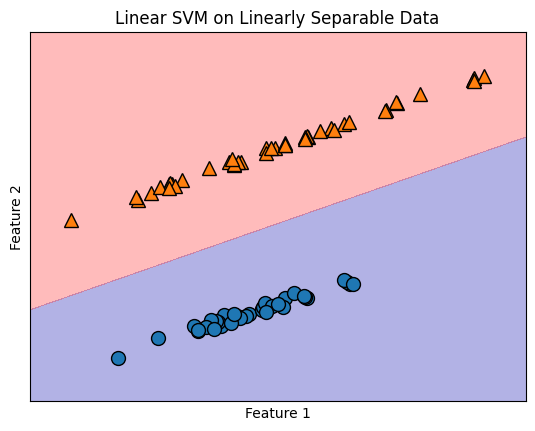

In [15]:
# Create a linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, class_sep=2.0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train_scaled, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(linear_svm, X_train_scaled, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.title("Linear SVM on Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Unseparable Data

Now, let's create a dataset that is not linearly separable and train a linear SVM on it.


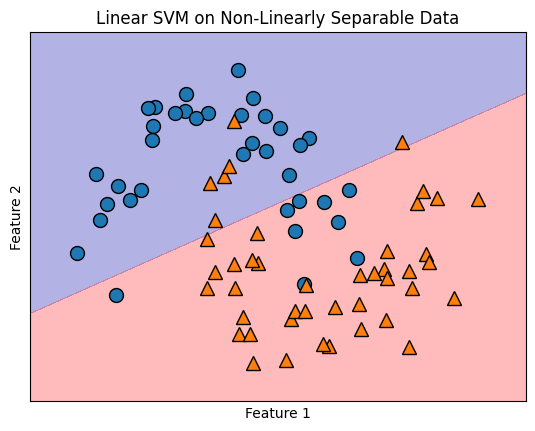

In [16]:
# Create a non-linearly separable dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear SVM
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train_scaled, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(linear_svm, X_train_scaled, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.title("Linear SVM on Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Non-Linearly Separable Data with Polynomial Kernel

Let's use a polynomial kernel to handle non-linearly separable data.


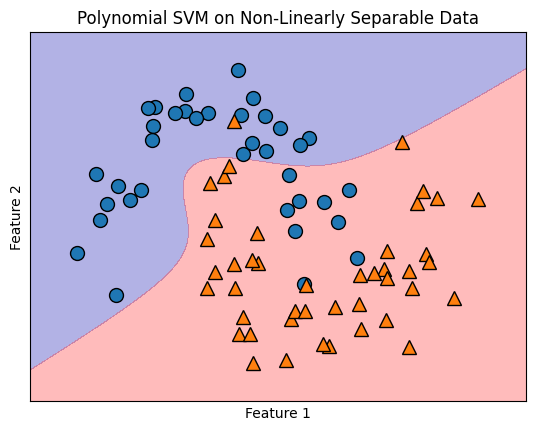

In [24]:
# Train a polynomial SVM
poly_svm = SVC(kernel='poly', degree=3, C=3)
poly_svm.fit(X_train_scaled, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(poly_svm, X_train_scaled, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.title("Polynomial SVM on Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Non-Linearly Separable Data with RBF Kernel

Finally, let's use an RBF kernel to handle non-linearly separable data.


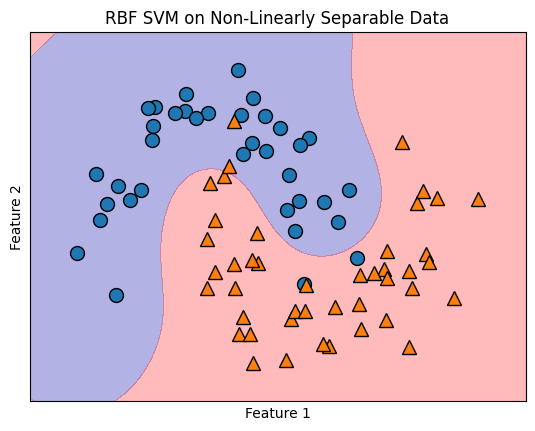

In [26]:
# Train an RBF SVM
rbf_svm = SVC(kernel='rbf', gamma=1, C=1)
rbf_svm.fit(X_train_scaled, y_train)

# Plot the decision boundary
mglearn.plots.plot_2d_separator(rbf_svm, X_train_scaled, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], y_train)
plt.title("RBF SVM on Non-Linearly Separable Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


## Hyperparameter Tuning

Let's see how the results change based on different hyperparameters for the RBF kernel.


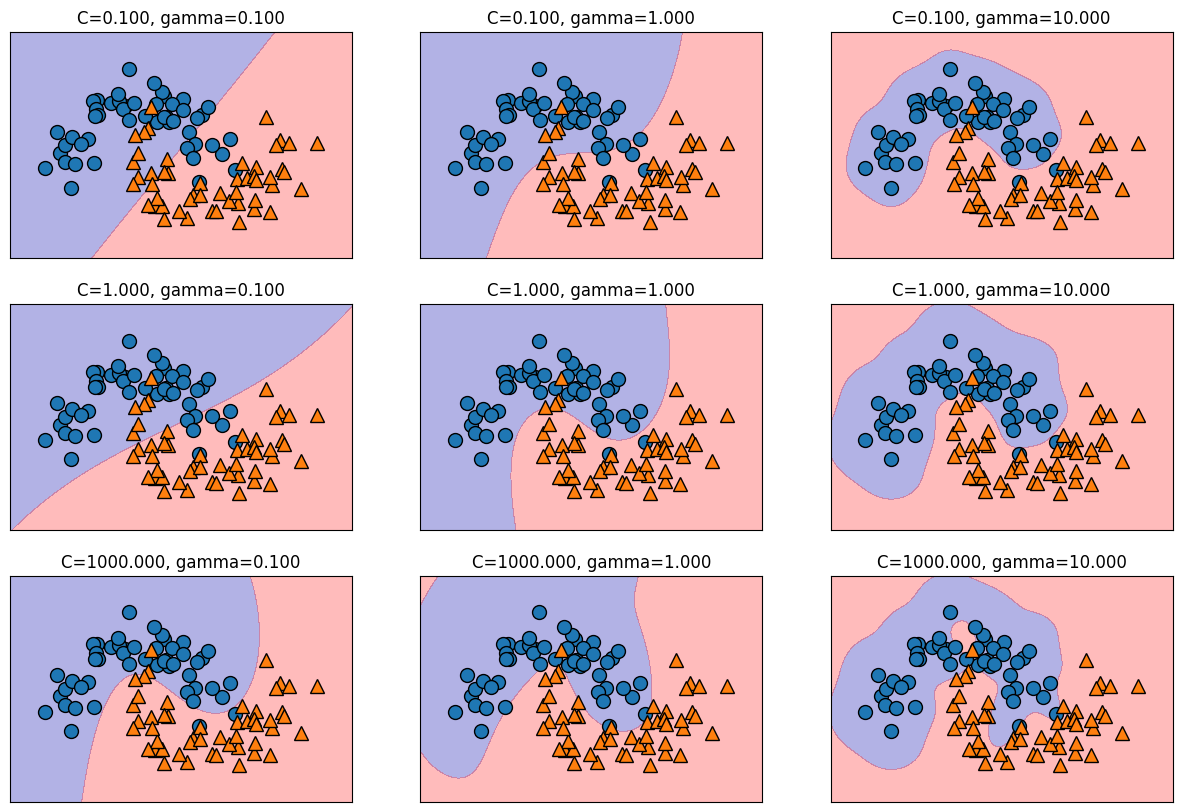

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, gamma in zip(ax,[0.1, 1, 10]):
        svm = SVC(C=C, gamma=gamma).fit(X,y)
        mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=a)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, fill=True, alpha=0.3, ax=a)
        a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))

## Scaling

Let's see the importance of scaling in SVMs by comparing the decision boundaries of an SVM with and without scaling on the moons dataset.

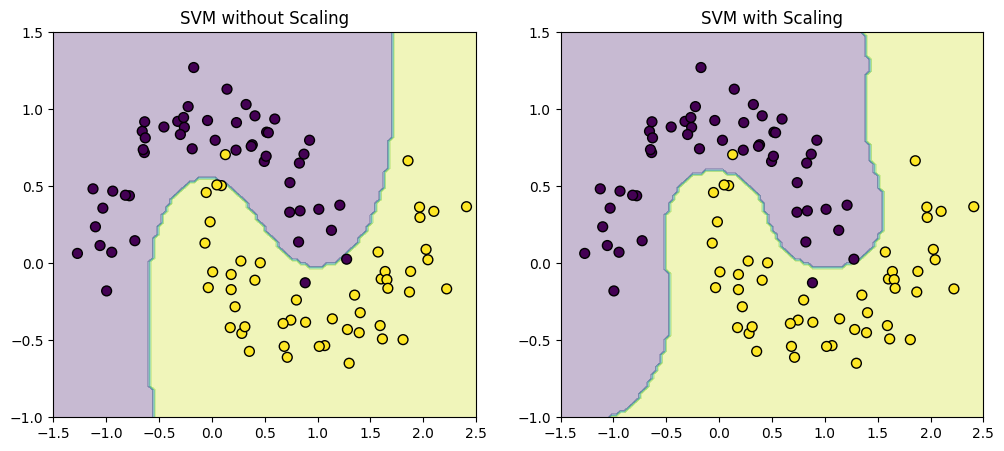

In [7]:

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM without scaling
svm_clf_no_scaling = SVC(kernel="rbf", gamma=1, C=1)
svm_clf_no_scaling.fit(X_train, y_train)

# Train an SVM with scaling
svm_clf_with_scaling = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=1, C=1))
svm_clf_with_scaling.fit(X_train, y_train)

# Plot the decision boundaries
def plot_decision_boundary(clf, X, y, ax, title):
    x0s = np.linspace(-1.5, 2.5, 100)
    x1s = np.linspace(-1, 1.5, 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    ax.contourf(x0, x1, y_pred, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k')
    ax.set_title(title)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_decision_boundary(svm_clf_no_scaling, X, y, axes[0], "SVM without Scaling")
plot_decision_boundary(svm_clf_with_scaling, X, y, axes[1], "SVM with Scaling")

plt.show()